### Objectives

-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


In [34]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [35]:
import pandas as pd

In [37]:
# we wiil print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [38]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [39]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [40]:
table_name = 'master' 

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

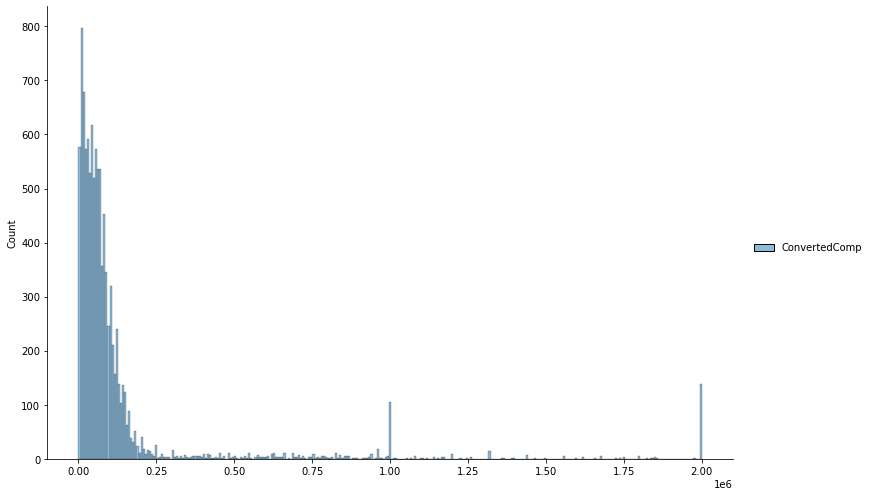

In [43]:
QUERY = "SELECT ConvertedComp FROM master"
df = pd.read_sql_query(QUERY,conn)

sns.displot(df, height = 7, aspect = 1.5)

        Age
0      22.0
1      23.0
2      28.0
3      26.0
4      29.0
...     ...
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

[11398 rows x 1 columns]


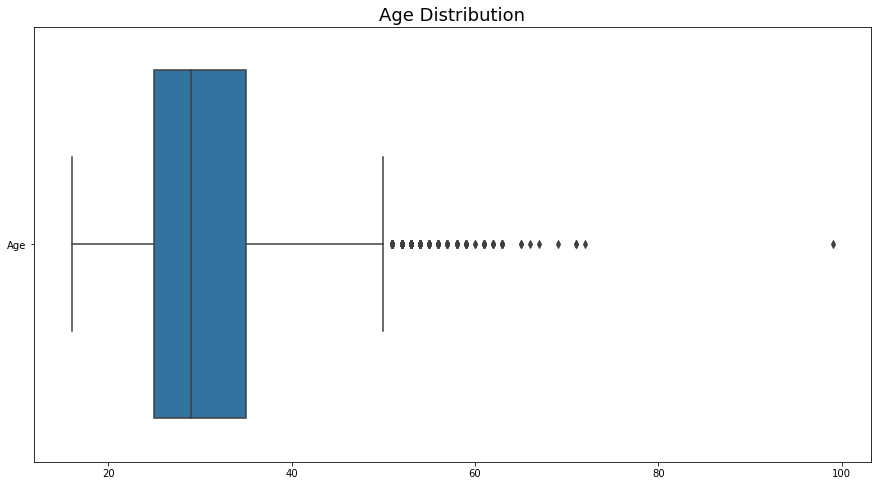

In [44]:
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.rcParams['figure.figsize'] = [15,8]

ax = sns.boxplot(data = df, orient = 'h')
ax.set_title('Age Distribution', size = 18)

plt.show()

### Visualizing relationship in data

        Age  WorkWeekHrs
0      22.0         80.0
1      23.0         32.0
2      28.0         40.0
3      26.0         40.0
4      29.0         45.0
...     ...          ...
11393  36.0         40.0
11394  25.0         40.0
11395  34.0         40.0
11396  25.0         42.5
11397  30.0         80.0

[11398 rows x 2 columns]


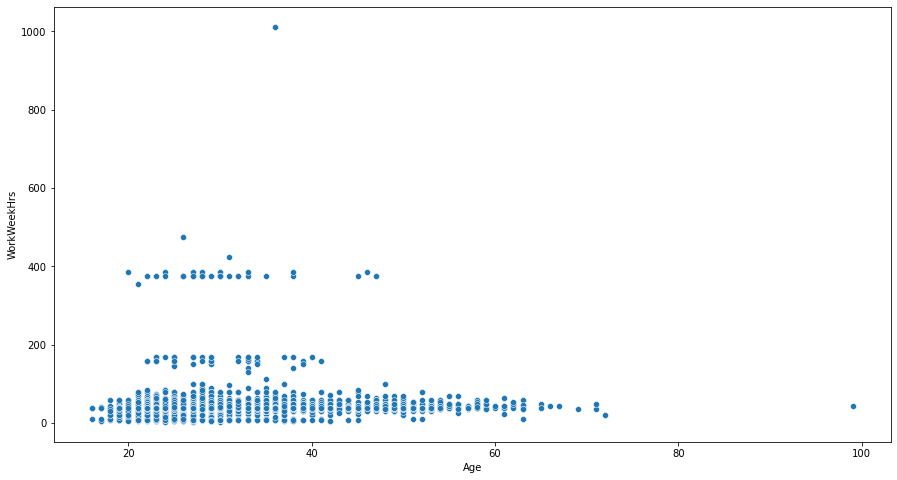

In [46]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
df = pd.read_sql_query(QUERY,conn)
print(df)

plt.rcParams['figure.figsize'] = [15,8]

sns.scatterplot(data = df, x = 'Age', y = 'WorkWeekHrs')

plt.show()

        Age  WorkWeekHrs  CodeRevHrs
0      22.0         80.0         NaN
1      23.0         32.0        12.0
2      28.0         40.0         5.0
3      26.0         40.0         NaN
4      29.0         45.0         5.0
...     ...          ...         ...
11393  36.0         40.0         NaN
11394  25.0         40.0         5.0
11395  34.0         40.0         5.0
11396  25.0         42.5         2.0
11397  30.0         80.0         1.0

[11398 rows x 3 columns]


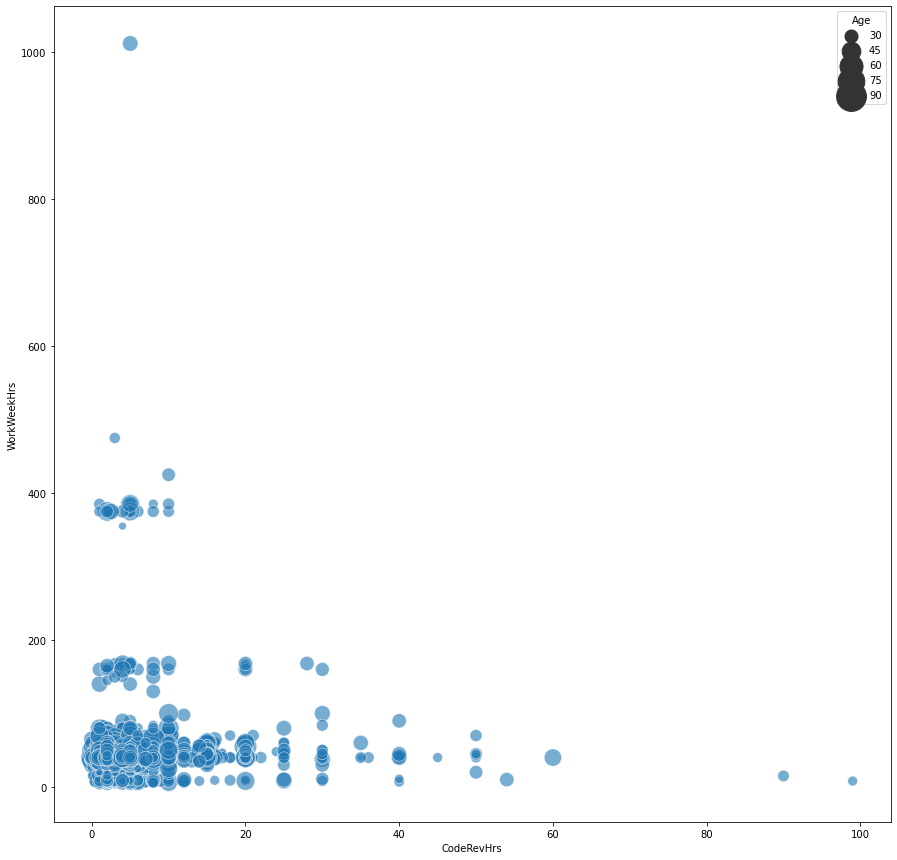

In [47]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.rcParams['figure.figsize'] = [15,15]

sns.scatterplot(data = df, y = 'WorkWeekHrs', x = 'CodeRevHrs', size = 'Age', alpha = 0.6, sizes=(1, 1000))
plt.show()

### Visualizing Composition of data

In [48]:
QUERY = """
SELECT *
FROM sqlite_master

"""
df = pd.read_sql_query(QUERY,conn)
df

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


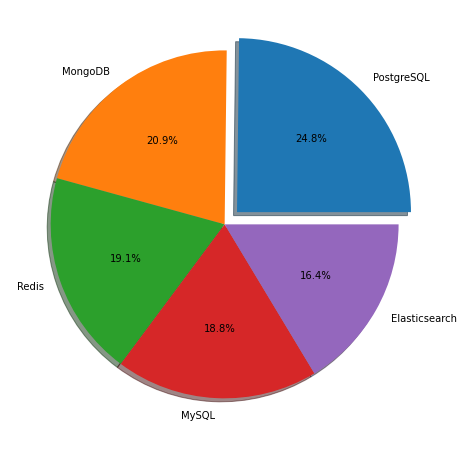

In [49]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
plt.show()

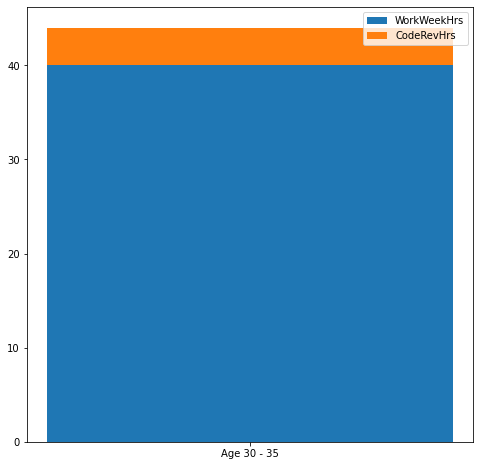

In [51]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""
df = pd.read_sql_query(QUERY,conn)

work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()

### Visualizing Comparison of data

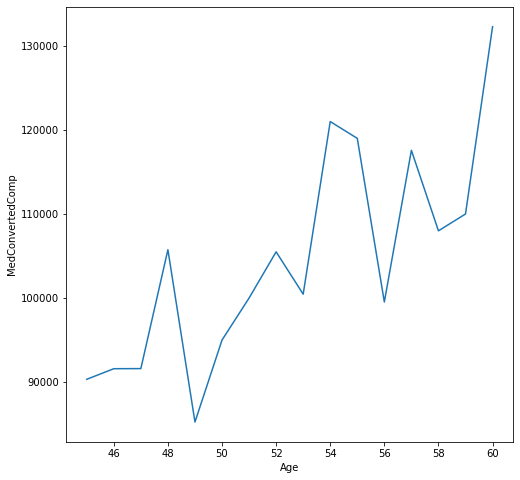

In [52]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()

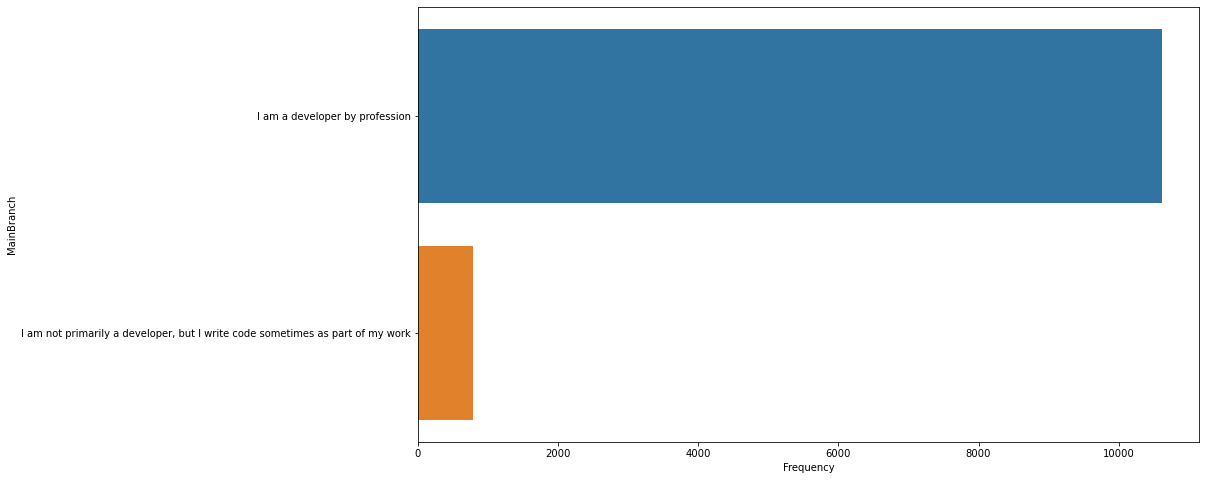

In [53]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch

"""
df = pd.read_sql_query(QUERY,conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()

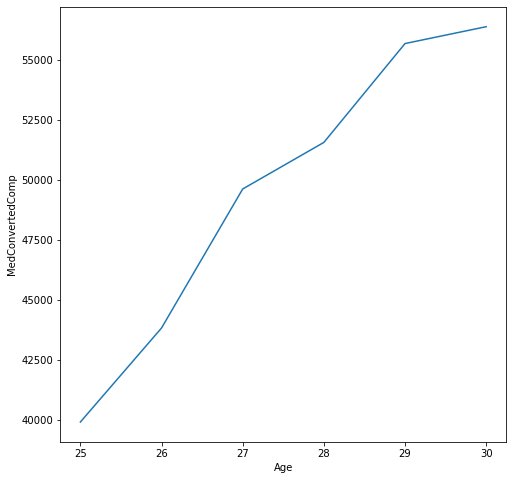

In [54]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()

In [55]:
QUERY = """
SELECT DevType, COUNT(*) as Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC

"""
pd.read_sql_query(QUERY,conn)

	

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [56]:
conn.close()